In [101]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Using Plotly for interactive plots
from sklearn.cluster import KMeans
import warnings


In [102]:
warnings.filterwarnings("ignore")
plt.rc("font", size=14)


In [104]:
# read the csv and print the first 5 rows
df = pd.read_excel("/Users/surajojha/Downloads/newww/data.xlsx")


In [105]:
df.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [106]:
# Renaming columns (if necessary)
df.rename(columns={'Genre':'Gender',
                   'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product'
                  },
          inplace=True)

In [107]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment Score 1-5     200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [108]:
#Looking for null values
df.isna().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Repayment Score 1-5       0
dtype: int64

In [109]:
df['Most_Purchased_Product'].value_counts()

Most_Purchased_Product
Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: count, dtype: int64

In [110]:
df['City'].value_counts()

City
Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: count, dtype: int64

In [111]:
# Data preprocessing for clustering
X = df[['Annual_Revenue', 'Spending_Score']]

In [112]:
# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


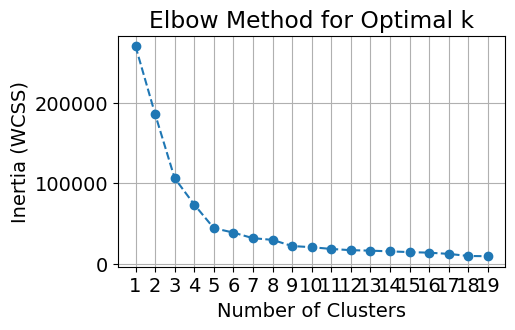

In [113]:
# Plotting the elbow method
plt.figure(figsize=(5, 3))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [114]:
#Applying K-Means clustering with optimal k
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_Number'] = kmeans.fit_predict(X)


In [115]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [116]:
# Assigning cluster nature based on Cluster_Number
cluster_nature_map = {
    0: 'General',
    1: 'Miser',
    2: 'Careful',
    3: 'Spendthrift',
    4: 'Target'
}
df['Cluster_Nature'] = df['Cluster_Number'].map(cluster_nature_map)


In [117]:
# Visualizing clusters using Plotly Express
fig = px.scatter(df, x='Annual_Revenue', y='Spending_Score', color='Cluster_Nature',
                 hover_data=['City', 'Most_Purchased_Product'], title='Clusters of Merchants')
fig.update_layout(xaxis_title='Annual Revenue (k$)', yaxis_title='Spending Score (1-100)')
fig.show()

In [118]:
df.loc[:,"Cluster_Number"] = y_kmeans

In [119]:
Cluster_Nature = []

for row in df['Cluster_Number']:
    if row == 0:
        Cluster_Nature.append('General')
    elif row == 1:
        Cluster_Nature.append('Miser') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Careful')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Target')
    else: Cluster_Nature.append('Outlier')

df['Cluster_Nature'] = Cluster_Nature


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment Score 1-5     200 non-null    int64 
 6   Cluster_Number          200 non-null    int32 
 7   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(4), object(3)
memory usage: 11.8+ KB


In [122]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,4,Target
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,2,Careful
2,3,16,6,Mtwara,Mtindi 500ml,3,4,Target
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,2,Careful
4,5,17,40,Mtwara,Mtindi 500ml,2,4,Target


In [123]:
df['Cluster_Nature'].value_counts()

Cluster_Nature
General        81
Miser          39
Spendthrift    35
Target         23
Careful        22
Name: count, dtype: int64

In [124]:
uniqueValues = df['Cluster_Nature'].unique()
print(uniqueValues)

['Target' 'Careful' 'General' 'Miser' 'Spendthrift']


In [125]:
target_df = df.loc[df['Cluster_Nature'] == 'Target']

In [126]:
target_df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,4,Target
2,3,16,6,Mtwara,Mtindi 500ml,3,4,Target
4,5,17,40,Mtwara,Mtindi 500ml,2,4,Target
6,7,18,6,Mtwara,Mtindi 500ml,2,4,Target
8,9,19,3,Mtwara,Mtindi 500ml,1,4,Target


In [127]:
# Compute percentages
city_cluster_percent = city_cluster_cross.apply(lambda x: x / x.sum() * 100, axis=1)


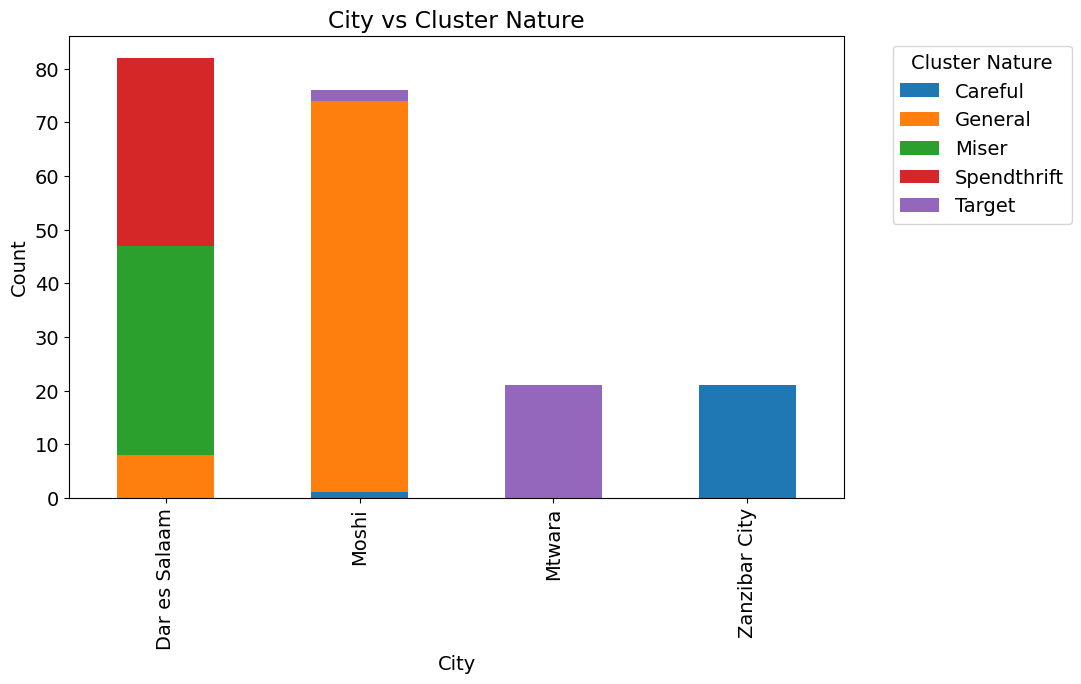

In [128]:
# Plotting cross tabulation as a grouped bar chart
city_cluster_cross.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('City vs Cluster Nature')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Cluster Nature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [129]:
# Cross tabulation between Most Purchased Product and Cluster Nature
product_cluster_cross = pd.crosstab(df['Most_Purchased_Product'], df['Cluster_Nature'])


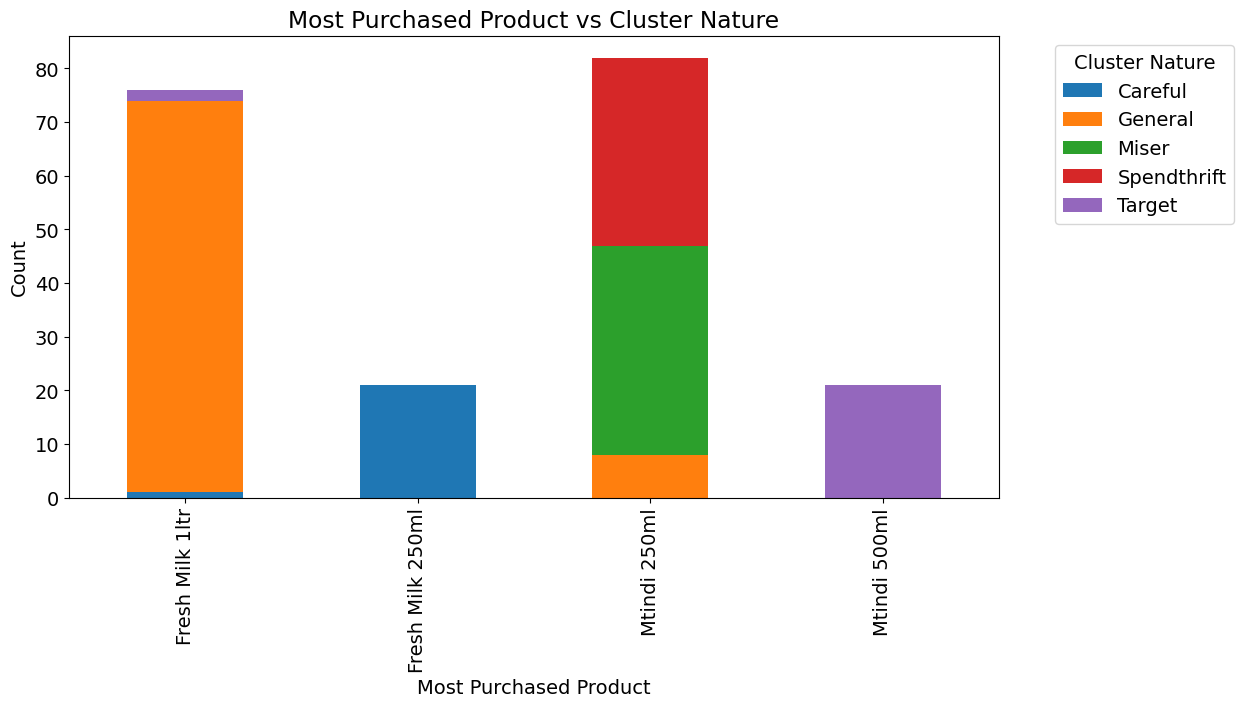

In [130]:
# Plotting cross tabulation as a grouped bar chart
product_cluster_cross.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Most Purchased Product vs Cluster Nature')
plt.xlabel('Most Purchased Product')
plt.ylabel('Count')
plt.legend(title='Cluster Nature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [131]:
# Pivot table on City vs Cluster Nature aggregated by Annual Revenue
city_pivot = pd.pivot_table(df, index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean})


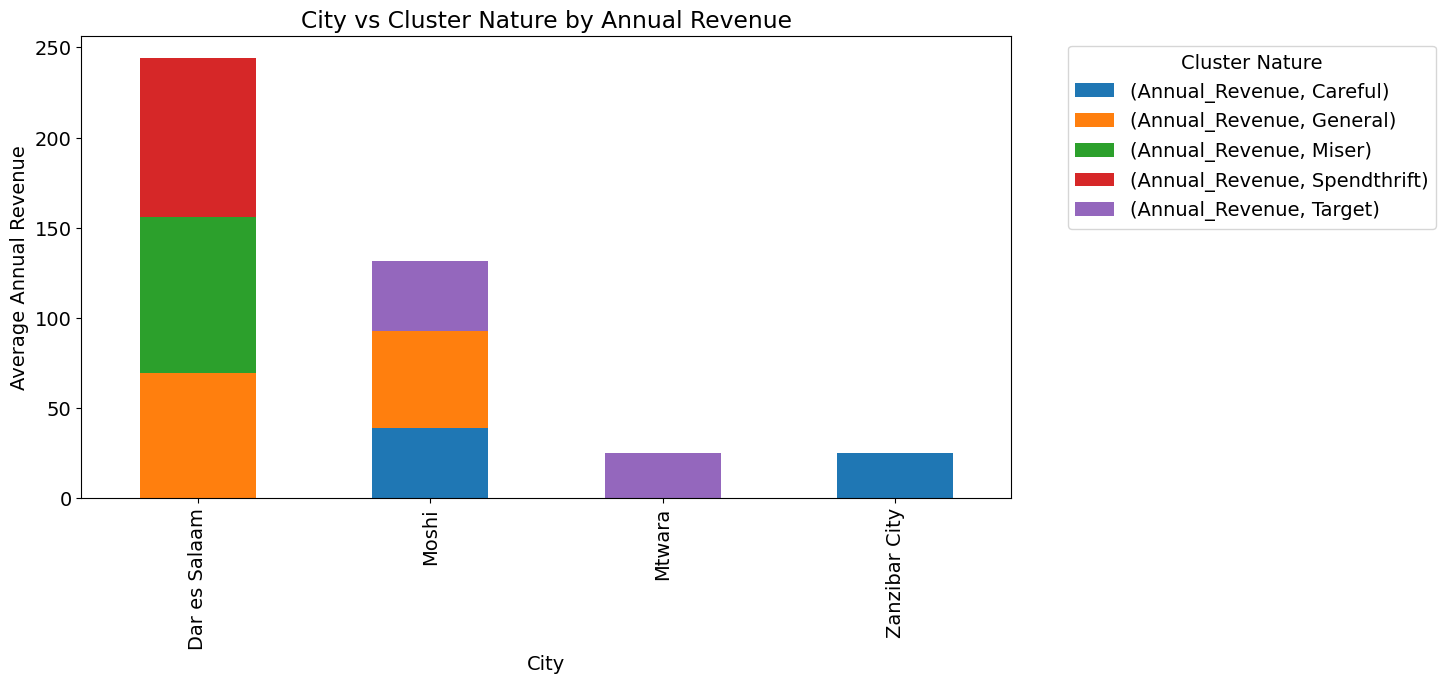

In [132]:
# Plotting pivot table as a bar chart
city_pivot.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('City vs Cluster Nature by Annual Revenue')
plt.xlabel('City')
plt.ylabel('Average Annual Revenue')
plt.legend(title='Cluster Nature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [135]:
# Saving the final analyzed data with clusters and nature to CSV
df.to_csv('final_analyzed_data.csv', index=False)
print('Final analyzed data saved to final_analyzed_data.csv')

Final analyzed data saved to final_analyzed_data.csv
